In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os # Importa os para manejo de rutas y directorios.

In [5]:
# cargar datos

def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv")
    return df


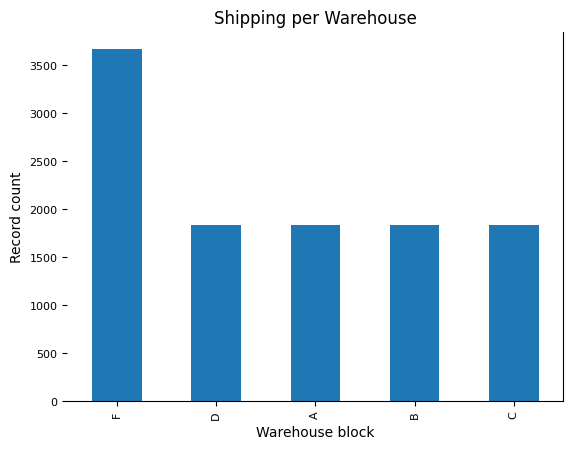

In [11]:
# visual for shipping per warehouse

def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record count",
        color = "tab:blue",
        fontsize = 8,
    )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    #plt.savefig(f'{output_dir}/shipping_per_warehouse.png')

df = load_data()
create_visual_for_shipping_per_warehouse(df)

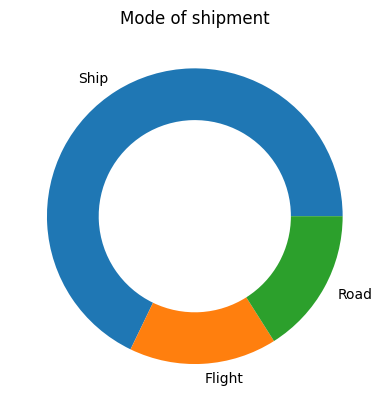

In [12]:
# visual for Mode od Shipment

def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of shipment",
        wedgeprops = dict(width=0.35),
        ylabel = "",
        colors = ["tab:blue", "tab:orange", "tab:green"],
    )

    #plt.savefig(f'{output_dir}/mode_of_shipment.png')

df = load_data()
create_visual_for_mode_of_shipment(df)

['tab:orange', 'tab:orange', 'tab:orange']

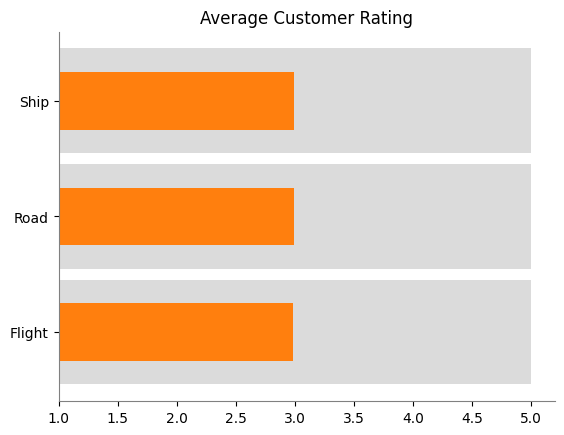

In [19]:
# visual for Averange Customer Rating

def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y = df.index.values,
        width = df["max"].values - 1,
        left = df["min"].values,
        height = 0.9,
        color = "lightgray",
        alpha = 0.8,
    )
    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y = df.index.values,
        width = df["mean"].values - 1,
        left = df["min"].values,
        color = colors,
        height = 0.5,
        alpha = 1.0,
    )

    plt.title("Average Customer Rating")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_color("gray")
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("gray")

    #plt.savefig(f'{output_dir}/average_customer_rating.png')


df = load_data()
create_visual_for_average_customer_rating(df)

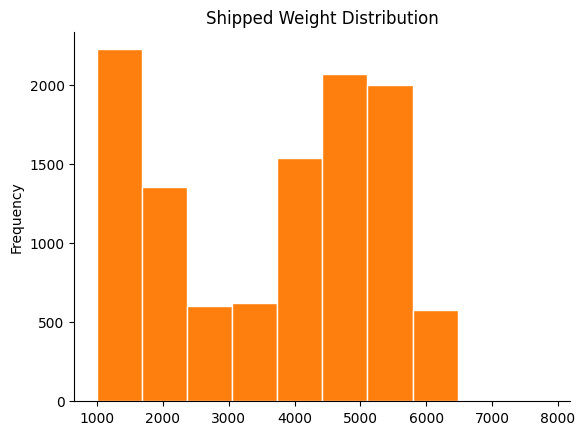

In [21]:
# visual for Weight Distribution

def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title = "Shipped Weight Distribution",  
        color = "tab:orange",
        edgecolor = "white",
    )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    #plt.savefig(f'{output_dir}/weight_distribution.png')

df = load_data()
create_visual_for_weight_distribution(df)

In [ ]:
%%writefile index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>